In [1]:
cd ../../code/

/home/wenfeng/repos/MLAlg/code


In [17]:
import sklearn.svm
import numpy as np
import utils
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_digits
from svm import svm

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preparing the Data

In [3]:
# X, y = utils.load_simple_data()

np.random.seed(2)
X, y = make_moons(noise=0.12)
y = 2 * y - 1

In [4]:
X.shape, y.shape

((100, 2), (100,))

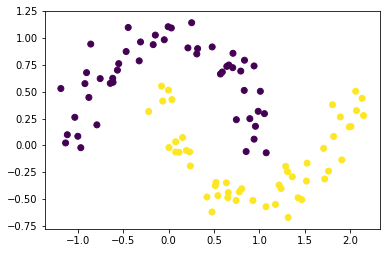

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y+1)

## Linear SVM(Version 1)
1. First use support vectors to compute $w$ and $b$
2. Then plot the decision boundary

In [6]:
cls = svm.SVMLinear()
cls.fit(X, y, seed=2)

Done in 1633 loops.


(-0.8706782229361292, 1.3419190697668724)

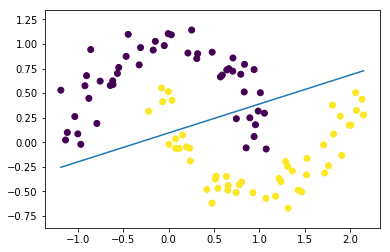

In [7]:
w1, w2 = cls.w[0, 0], cls.w[1, 0]
b = cls.b
xmax, xmin = X[:, 0].max(), X[:, 0].min()
y1 = -w1*xmax/w2 - b/w2
y2 = -w1*xmin/w2 - b/w2

plt.scatter(X[:, 0], X[:, 1], c=y+1)
plt.plot([xmax, xmin], [y1, y2])
plt.ylim([X[:, 1].min()-0.2, X[:, 1].max()+0.2])

In [8]:
print('Accuracy: %.4f' % (np.mean(cls.predict(X) == y)))

Accuracy: 0.8700


## Linear SVM(Version 2)
1. Use support vectors to perform prediction
2. Do not compute the parameter $w$

In [9]:
cls = svm.SVM(kernel='linear')
cls.fit(X, y, seed=2)

Done in 1633 loops.


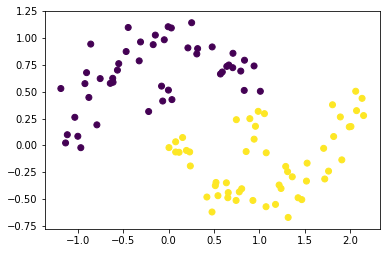

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=cls.predict(X)+1)

## Gaussian Kernel(RBF)

In [11]:
cls = svm.SVM(kernel=svm.KERNELS['rbf'](sigma=0.5))
cls.fit(X, y, seed=2)

Done in 2126 loops.


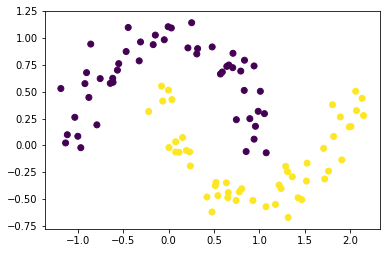

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=cls.predict(X)+1)

In [13]:
print('Accuracy: %.4f' % (np.mean(cls.predict(X) == y)))

Accuracy: 1.0000


## Polynormal Kernel

In [14]:
cls = svm.SVM(C=1, kernel=svm.KERNELS['poly'](c=2, d=3))
cls.fit(X, y, seed=2)

Done in 6262 loops.


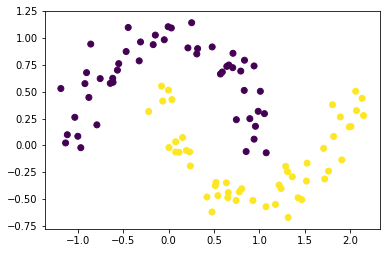

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=cls.predict(X)+1)

In [16]:
print('Accuracy: %.4f' % (np.mean(cls.predict(X) == y)))

Accuracy: 1.0000


## Digit Classification with RBF kernel

In [36]:
data, target = load_digits(return_X_y=True)
Yt = np.zeros_like(target)
Yt[target == 5] = 1
Yt[target != 5] = -1

In [37]:
data.shape, Yt.shape

((1797, 64), (1797,))

In [45]:
cls = svm.SVM(kernel=svm.RBFKernel(sigma=1))
cls.fit(data, Yt)

Done in 28431 loops.


In [46]:
print('Accuracy: %.4f' % (np.mean(cls.predict(data) == Yt)))

Accuracy: 1.0000


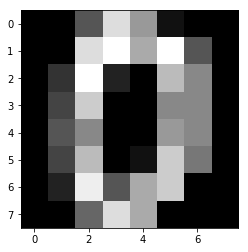

In [47]:
plt.imshow(data[0].reshape(8, 8), cmap='gray')

In [53]:
svm.SVMLinear()

SVMLinear(C=1, tol=100, eps=0.001, kernel=LinearKernel())